# Principal Component Analysis (PCA) for Data Visualization

**Instruction**
- Use the Automobile Data Set already downloaded from this website "http://archive.ics.uci.edu/ml/datasets/Automobile![image.png(attachment:image.png)"           
(can be found in the same folder as this Jupyter notebook)
- Find the highest Principal Component Axis
- Visualize the two highest Principal Component Axis using scatterplots

**Plan of Attack**
1. Import and convert the Json file into workable format
2. Do an EDA on the data and select the quantitative variables for PCA analysis
3. Standardize each numerical attribute to have a mean = 0 and variance = 1
4. Visualize the PC and % explained variance 
5. Visualize the data using the two highest PCs using scatterplot

## Import Packages and Data

In [329]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
path = "./imports-85.data"
colnames = ["symboling","normalized-losses","make","fuel-type","aspiration","num-of-doors",
            "body-style","drive-wheels","engine-location","wheel-base","length","width","height",
            "curb-weight","engine-type","num-of-cylinders","engine-size","fuel-system","bore","stroke",
            "compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]

data = pd.read_csv(path, names = colnames)

In [80]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

## Do EDA and select quantitative variables

In [231]:
#get a list of attributes with just numerical data and exclude "object" type
numeric_cols = [name for name in data.columns if data[name].dtype != 'O'] 
num_data = data.loc[:,numeric_cols]

In [232]:
#Don't see any missing values, Good to go
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
symboling            205 non-null int64
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-size          205 non-null int64
compression-ratio    205 non-null float64
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
dtypes: float64(5), int64(5)
memory usage: 16.1 KB


In [277]:
num_data.head(5)

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22


In [322]:
num_data.shape

(205, 10)

## Standardize the selected attributes

In [260]:
#create a standard scaler for standardization
scaler = StandardScaler()

#need to input the data as nparray into the standardizer 
x = scaler.fit_transform(num_data.values)

In [306]:
#view the standardized data using pandas
pd.DataFrame(x, columns = numeric_cols ).head(5)

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
0,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,-0.288349,-0.646553,-0.546059
1,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,-0.288349,-0.646553,-0.546059
2,0.133509,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-0.288349,-0.953012,-0.691627
3,0.938490,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.035973,-0.186865,-0.109354
4,0.938490,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.540725,-1.106241,-1.273900


## Visualize PCA and Explained Variance 

In [262]:
#start a PCA o
pca = PCA()

#calculate the principal components
fitted_pca = pca.fit_transform(x)

In [296]:
#there are 10 principal components
fitted_pca.shape[1]

10

In [310]:
#print the computed PCA
pca_df = pd.DataFrame(data = fitted_pca, columns = ["Principal Component "+ str(i) for i in range(1,11)])
pca_df.head(5)

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10
0,-1.283523,-2.835866,1.022796,-0.065830,-0.446345,-0.638250,-0.315165,-0.453652,0.132602,0.108899
1,-1.283523,-2.835866,1.022796,-0.065830,-0.446345,-0.638250,-0.315165,-0.453652,0.132602,0.108899
2,0.429662,-1.351623,0.022545,0.290155,-0.138992,-0.892448,0.198209,-0.104467,0.136265,-0.155644
3,-0.111933,-0.292705,0.090390,-0.997752,-0.078539,0.470102,-0.085995,0.053258,-0.316107,-0.008032
4,1.197674,-1.387291,-0.258406,-0.952451,-0.102837,-0.247589,0.080465,0.266806,0.044176,0.115372


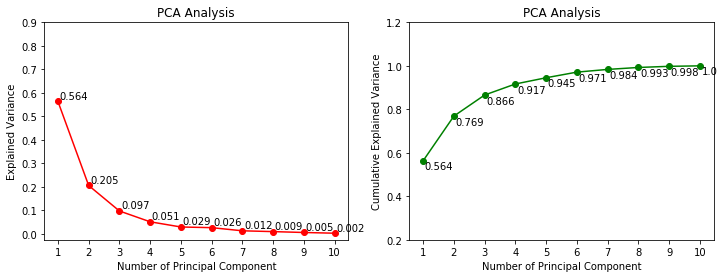

In [318]:
%matplotlib inline

#graph the calculated PCA explained variance ratio
y_1 = pca.fit(x).explained_variance_ratio_
x_1 = range(1,len(y)+1)

fig,[ax1,ax2] = plt.subplots(ncols=2, figsize=(12,4))

#plot the individual PCA graph
ax1.plot(x_1,y_1, marker = "o", color = 'r')
ax1.set_xticks(range(1,len(y_1)+1))
ax1.set_yticks(np.arange(0,1, step = 0.1))
ax1.set_xlabel("Number of Principal Component")
ax1.set_ylabel("Explained Variance")
ax1.set_title("PCA Analysis")
#annotate the points
for i,j in zip(x_1,y_1):
    num = np.round(j,decimals=3)
    ax1.annotate(str(num),xy=(i+0.05,j+0.01))

    
#plot the cumulative PCA graph
y_2 = pca.fit(x).explained_variance_ratio_.cumsum()

ax2.plot(x_1,y_2, marker = "o", color = 'g')
ax2.set_xticks(range(1,len(y_2)+1))
ax2.set_yticks(np.arange(0.2,1.3, step = 0.2))
ax2.set_xlabel("Number of Principal Component")
ax2.set_ylabel("Cumulative Explained Variance")
ax2.set_title("PCA Analysis")
#annotate the points
for i,j in zip(x_1,y_2):
    num = np.round(j,decimals=3)
    ax2.annotate(str(num),xy=(i+0.05,j-0.04))
  


plt.show()

## Visualize the 2 Highest PC using scatterplots

In [346]:
#select the highest 2 PC and add the "fuel-type"
top_2_pca = pca_df.iloc[:,:2].join(data.loc[:,'fuel-type'])
top_2_pca.head(5)

,Principal Component 1,Principal Component 2,fuel-type
0,-1.283523,-2.835866,gas
1,-1.283523,-2.835866,gas
2,0.429662,-1.351623,gas
3,-0.111933,-0.292705,gas
4,1.197674,-1.387291,gas


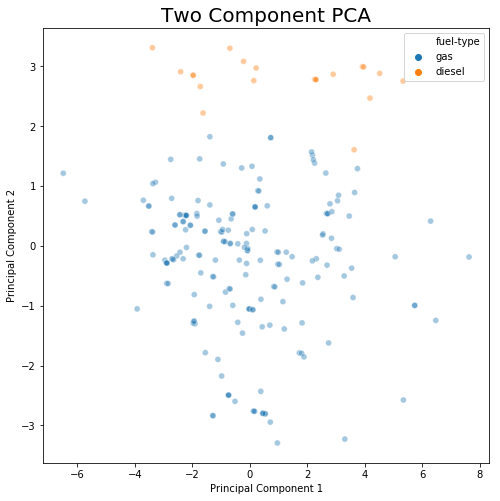

In [354]:
#plot the highest 2 principal components, group by fuel-type

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

sns.scatterplot(data=top_2_pca,
            x ="Principal Component 1",
            y ="Principal Component 2",
            hue = "fuel-type",
            alpha = 0.4,
            ax = ax
           )
ax.set_title("Two Component PCA", fontsize = 20)
plt.show()


## **Comments**
- The two fuel type seems to be well separated by the 2 principal components! 